# import

In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
from os import path

In [3]:
import taproc as tp
from taproc.pre_processing import *
from taproc.dataset import *
from taproc.learner import *
from taproc.feature import *
from taproc.interpretation import *

# read file

In [4]:
file_path = Path('/media/zero/dropbox/Dropbox/Data science project/kaggle/home_credit_default_risk/data')

In [5]:
app_train = pd.read_csv(str(file_path/'application_train.csv'))

In [6]:
app_train_proc, y, na_dict = tabular_proc(app_train, y_fld = 'TARGET', max_n_cat=15)

# train test split from sklearn

In [7]:
ds = TBDataset.from_SklearnSplit(app_train_proc, y)

# baseline model

In [8]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':30,
    'learning_rate':0.1,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}

In [9]:
learner = LGBLearner()

In [10]:
learner.fit(params, 
            *ds.trn_n_val(),
            early_stopping_rounds=50)

[1]	training's binary_logloss: 0.62474	valid_1's binary_logloss: 0.624722
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.569101	valid_1's binary_logloss: 0.569116
[3]	training's binary_logloss: 0.522705	valid_1's binary_logloss: 0.522774
[4]	training's binary_logloss: 0.484084	valid_1's binary_logloss: 0.48418
[5]	training's binary_logloss: 0.451475	valid_1's binary_logloss: 0.451629
[6]	training's binary_logloss: 0.423581	valid_1's binary_logloss: 0.42377
[7]	training's binary_logloss: 0.399776	valid_1's binary_logloss: 0.399986
[8]	training's binary_logloss: 0.379419	valid_1's binary_logloss: 0.379676
[9]	training's binary_logloss: 0.361912	valid_1's binary_logloss: 0.362191
[10]	training's binary_logloss: 0.347023	valid_1's binary_logloss: 0.347356
[11]	training's binary_logloss: 0.334114	valid_1's binary_logloss: 0.33451
[12]	training's binary_logloss: 0.322992	valid_1's binary_logloss: 0.323486
[13]	training's binary_logloss: 0.31322

# dendrogram

In [11]:
ddg = dendogram.from_df(ds.x_trn)

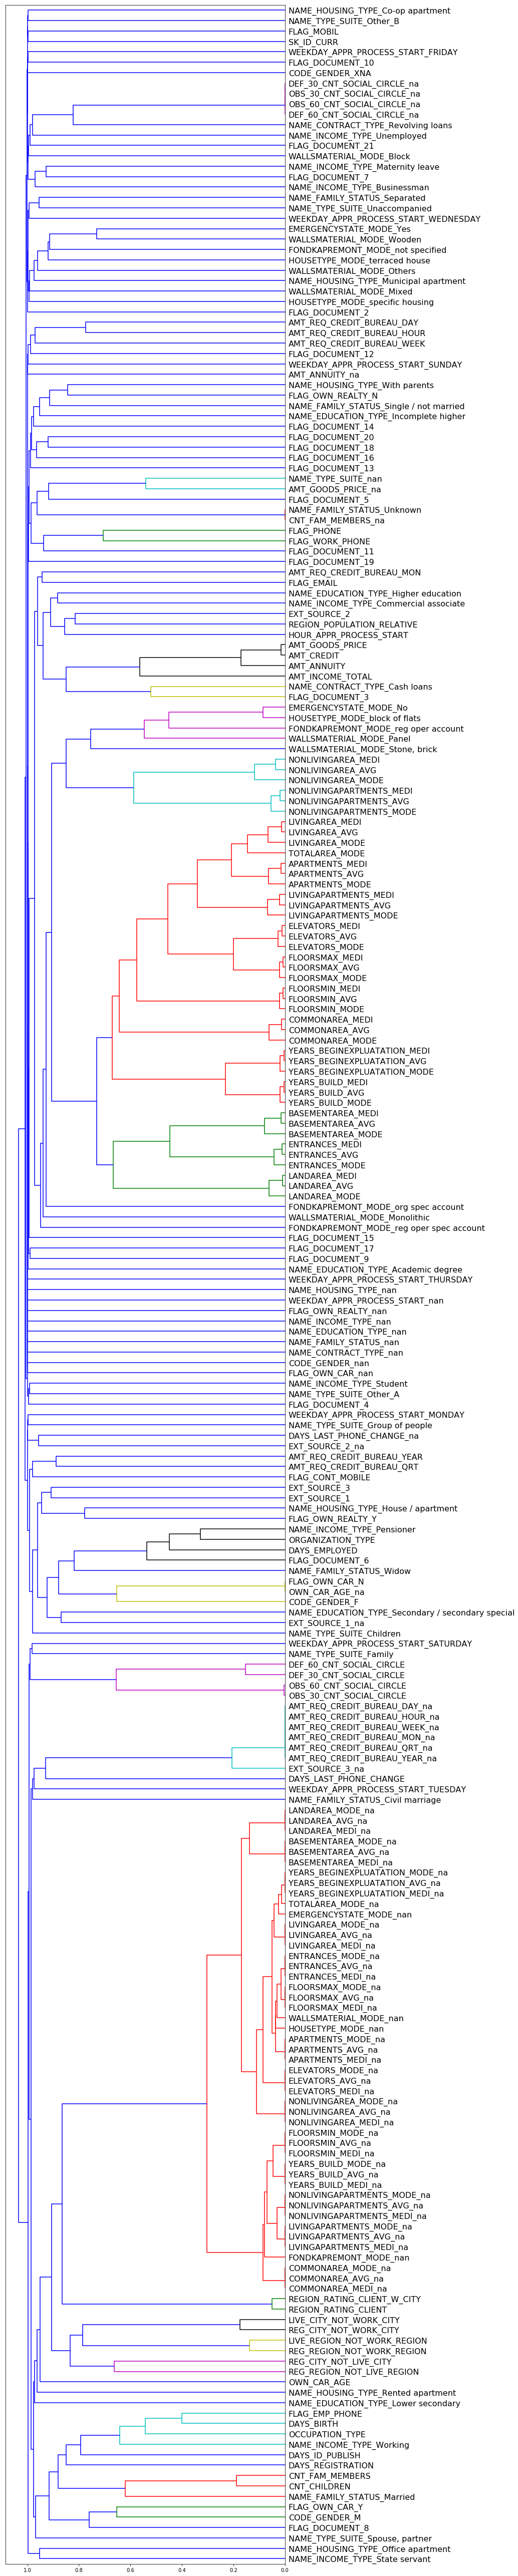

In [16]:
ddg.plot()

In [17]:
ddg.result.head(10)

,col1,col2,dist
0,YEARS_BEGINEXPLUATATION_AVG_na,YEARS_BEGINEXPLUATATION_MODE_na,0.0
1,YEARS_BEGINEXPLUATATION_MEDI_na,---,0.0
2,FLOORSMAX_AVG_na,FLOORSMAX_MODE_na,0.0
3,FLOORSMAX_MEDI_na,---,0.0
4,ENTRANCES_AVG_na,ENTRANCES_MODE_na,0.0
5,ENTRANCES_MEDI_na,---,0.0
6,APARTMENTS_AVG_na,APARTMENTS_MODE_na,0.0
7,APARTMENTS_MEDI_na,---,0.0
8,LIVINGAREA_AVG_na,LIVINGAREA_MODE_na,0.0
9,LIVINGAREA_MEDI_na,---,0.0


In [11]:
grp = [['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
     ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
     ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
     ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
     ['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI'],
     ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE','TOTALAREA_MODE'],
     ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
     ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
     ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
     ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
     ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
     ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
     ['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'],
     ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
     ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
     ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
     ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
     ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
     ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
     ['LANDAREA_AVG_na', 'LANDAREA_MODE_na','LANDAREA_MEDI_na'],
     ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
     ['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
      'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
      'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
     ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
     ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
     ['YEARS_BEGINEXPLUATATION_AVG_na', 'YEARS_BEGINEXPLUATATION_MODE_na', 
      'YEARS_BEGINEXPLUATATION_MEDI_na', 'TOTALAREA_MODE_na', 'EMERGENCYSTATE_MODE_nan'],
     ['LIVINGAREA_AVG_na', 'LIVINGAREA_MODE_na', 'LIVINGAREA_MEDI_na'],
     ['ENTRANCES_AVG_na', 'ENTRANCES_MODE_na', 'ENTRANCES_MEDI_na',
      'FLOORSMAX_AVG_na', 'FLOORSMAX_MODE_na', 'FLOORSMAX_MEDI_na', 'WALLSMATERIAL_MODE_nan'],
     ['APARTMENTS_AVG_na', 'APARTMENTS_MODE_na', 'APARTMENTS_MEDI_na', 'HOUSETYPE_MODE_nan'],
     ['ELEVATORS_AVG_na', 'ELEVATORS_MODE_na', 'ELEVATORS_MEDI_na'],
     ['NONLIVINGAREA_AVG_na', 'NONLIVINGAREA_MODE_na', 'NONLIVINGAREA_MEDI_na'],
     ['FLOORSMIN_AVG_na', 'FLOORSMIN_MODE_na', 'FLOORSMIN_MEDI_na'],
     ['YEARS_BUILD_AVG_na', 'YEARS_BUILD_MODE_na', 'YEARS_BUILD_MEDI_na'],
     ['NONLIVINGAPARTMENTS_AVG_na', 'NONLIVINGAPARTMENTS_MODE_na', 'NONLIVINGAPARTMENTS_MEDI_na'],
     ['LIVINGAPARTMENTS_AVG_na', 'LIVINGAPARTMENTS_MODE_na', 'LIVINGAPARTMENTS_MEDI_na'],
     ['COMMONAREA_AVG_na', 'COMMONAREA_MODE_na', 'COMMONAREA_MEDI_na'],
     ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']]

In [12]:
group_cols = grp

# feature importance

In [29]:
class impta:
    def __init__(self, impt_df):
        self.I = sort_desc(impt_df)
    
    @classmethod
    def from_Learner(cls, learner, ds,  group_cols):
        '''
        http://explained.ai/rf-importance/index.html
        '''
        y_pred = learner.predict(ds.x_val)
        baseline = roc_auc_score(ds.y_val, y_pred)        
        I = pd.DataFrame.from_dict({'Feature': [' & '.join(to_list(cols)) for cols in group_cols]})
        I['Importance'] = I.apply(cls.permut_score, axis = 1, 
                                  learner = learner, ds = ds, baseline = baseline)
        return cls(I)
            
    @staticmethod
    def permut_score(x, learner, ds, baseline):
        cols = x[0].split(' & ')
        y_pred_permut = learner.predict(ds.val_permutation(cols))
        permut_score = roc_auc_score(ds.y_val, y_pred_permut)
        return baseline - permut_score

    def top(self, n): return [col.split(' & ') for col in self.I.Feature[:n]]

    def plot(self, **kagrs): plot_barh(self.I, **kagrs)

In [30]:
impt = impta.from_Learner(learner, ds, group_cols)

In [31]:
impt.I[:5]

,Feature,Importance
1,AMT_GOODS_PRICE & AMT_CREDIT & AMT_ANNUITY,0.005033
21,AMT_REQ_CREDIT_BUREAU_HOUR_na & AMT_REQ_CREDIT...,0.001071
17,DEF_30_CNT_SOCIAL_CIRCLE & DEF_60_CNT_SOCIAL_C...,0.000462
0,FLAG_OWN_CAR_N & OWN_CAR_AGE,0.000368
9,FLOORSMAX_AVG & FLOORSMAX_MEDI & FLOORSMAX_MODE,0.000082


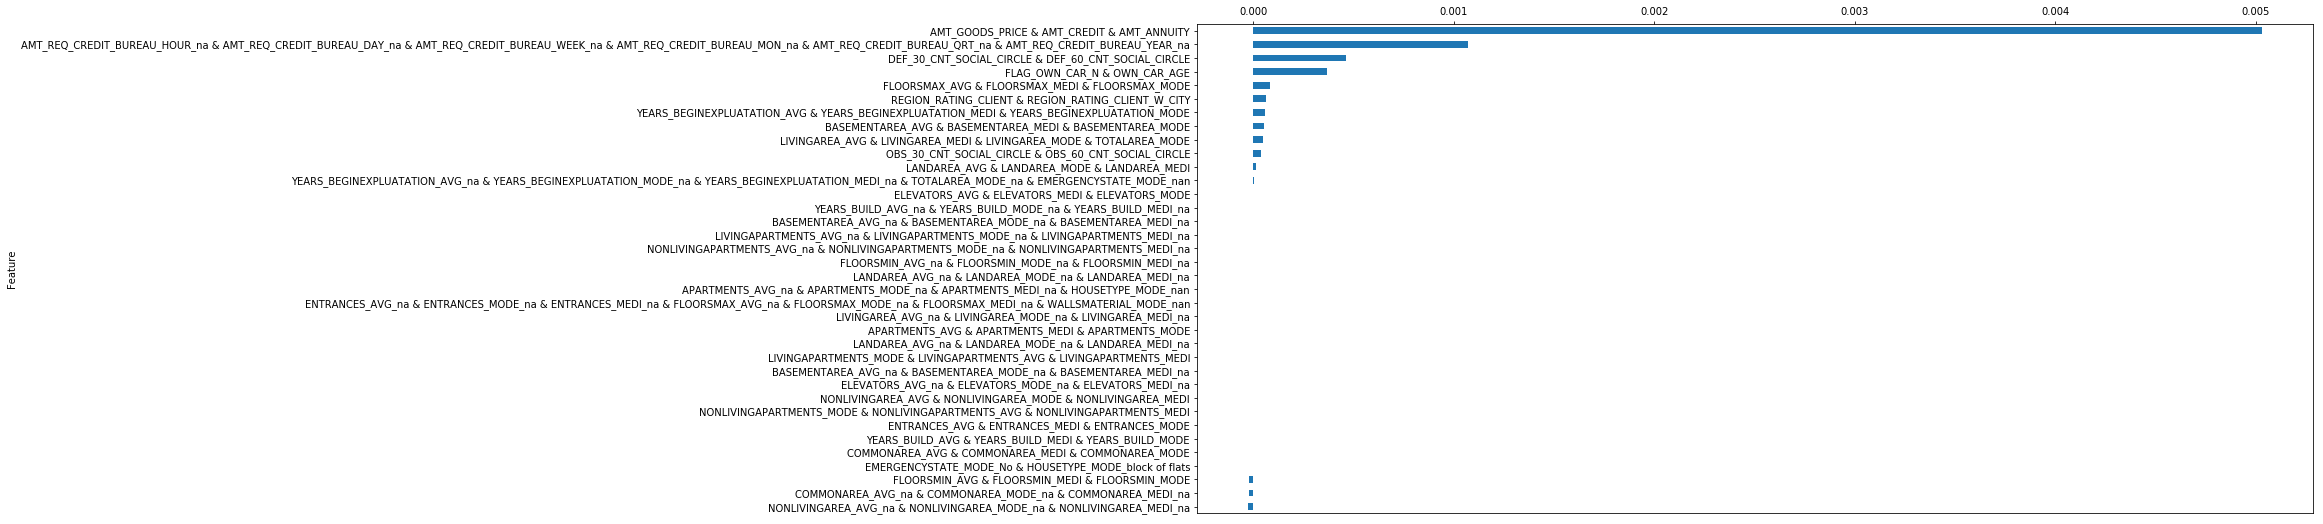

In [32]:
impt.plot()

In [33]:
impt.top(27)

[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
 ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'TOTALAREA_MODE'],
 ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
 ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
 ['YEARS_BEGINEXPLUATATION_AVG_na',
  'YEARS_BEGINEXPLUATATION_MODE_na',
  'YEARS_BEGINEXPLUATATION_MEDI_na',
  'TOTALAREA_MODE_na',
  'EMERGENCYSTATE_MODE_nan'],
 ['ELEVATORS_

In [10]:
a = [['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
 ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'TOTALAREA_MODE'],
 ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
 ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
 ['YEARS_BEGINEXPLUATATION_AVG_na',
  'YEARS_BEGINEXPLUATATION_MODE_na',
  'YEARS_BEGINEXPLUATATION_MEDI_na',
  'TOTALAREA_MODE_na',
  'EMERGENCYSTATE_MODE_nan'],
 ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
 ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
 ['LIVINGAPARTMENTS_AVG_na',
  'LIVINGAPARTMENTS_MODE_na',
  'LIVINGAPARTMENTS_MEDI_na'],
 ['NONLIVINGAPARTMENTS_AVG_na',
  'NONLIVINGAPARTMENTS_MODE_na',
  'NONLIVINGAPARTMENTS_MEDI_na'],
 ['YEARS_BUILD_AVG_na', 'YEARS_BUILD_MODE_na', 'YEARS_BUILD_MEDI_na'],
 ['FLOORSMIN_AVG_na', 'FLOORSMIN_MODE_na', 'FLOORSMIN_MEDI_na'],
 ['ELEVATORS_AVG_na', 'ELEVATORS_MODE_na', 'ELEVATORS_MEDI_na'],
 ['APARTMENTS_AVG_na',
  'APARTMENTS_MODE_na',
  'APARTMENTS_MEDI_na',
  'HOUSETYPE_MODE_nan'],
 ['ENTRANCES_AVG_na',
  'ENTRANCES_MODE_na',
  'ENTRANCES_MEDI_na',
  'FLOORSMAX_AVG_na',
  'FLOORSMAX_MODE_na',
  'FLOORSMAX_MEDI_na',
  'WALLSMATERIAL_MODE_nan'],
 ['LIVINGAREA_AVG_na', 'LIVINGAREA_MODE_na', 'LIVINGAREA_MEDI_na'],
 ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
 ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
 ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
 ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
 ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na']]

In [34]:
keep_ft = flat_list(impt.top(27))

In [11]:
keep_ft = flat_list(a)

In [12]:
ds.keep(keep_ft)

In [13]:
learner.fit(params, 
            *ds.trn_n_val(),
            early_stopping_rounds=50)

[1]	training's binary_logloss: 0.625914	valid_1's binary_logloss: 0.625884
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.570952	valid_1's binary_logloss: 0.570916
[3]	training's binary_logloss: 0.52545	valid_1's binary_logloss: 0.525448
[4]	training's binary_logloss: 0.487597	valid_1's binary_logloss: 0.487632
[5]	training's binary_logloss: 0.455589	valid_1's binary_logloss: 0.45564
[6]	training's binary_logloss: 0.428508	valid_1's binary_logloss: 0.428592
[7]	training's binary_logloss: 0.405502	valid_1's binary_logloss: 0.405604
[8]	training's binary_logloss: 0.385918	valid_1's binary_logloss: 0.386034
[9]	training's binary_logloss: 0.369265	valid_1's binary_logloss: 0.36942
[10]	training's binary_logloss: 0.354915	valid_1's binary_logloss: 0.355106
[11]	training's binary_logloss: 0.342614	valid_1's binary_logloss: 0.342826
[12]	training's binary_logloss: 0.332085	valid_1's binary_logloss: 0.332334
[13]	training's binary_logloss: 0.3231

# partial dependence

In [16]:
ds.x_val.columns

Index(['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na',
       'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na',
       'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_OWN_CAR_N', 'OWN_CAR_AGE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI',
       'FLOORSMAX_MODE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI',
       'BASEMENTAREA_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'LANDAREA_AVG', 'LANDAREA_MODE',
       'LANDAREA_MEDI', 'YEARS_BEGINEXPLUATATION_AVG_na',
       'YEARS_BEGINEXPLUATATION_MODE_na', 'YEARS_BEGINEXPLUATATION_MEDI_na',
       'TOTALAREA_MOD

In [14]:
pdpd = PartialDependence.from_LGBLearner(learner, ds)

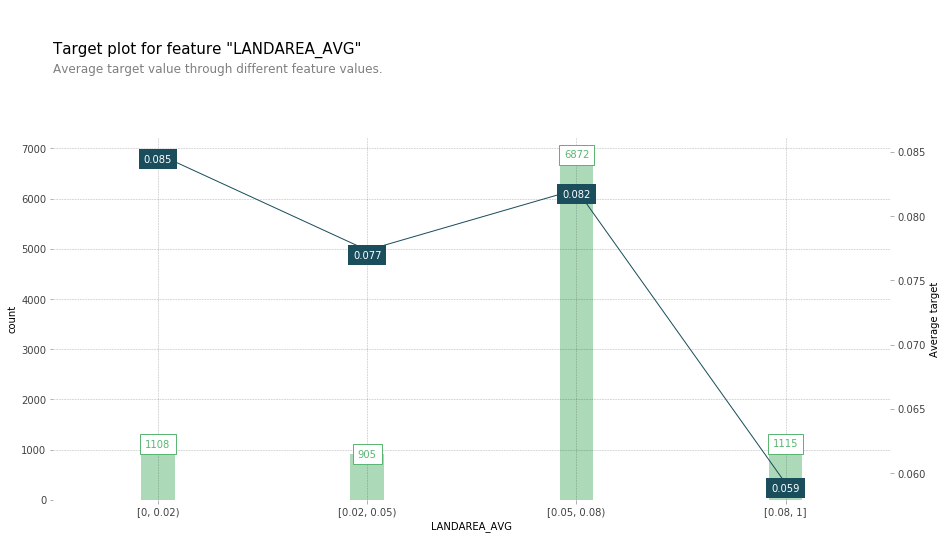

In [17]:
pdpd.info_target('LANDAREA_AVG')

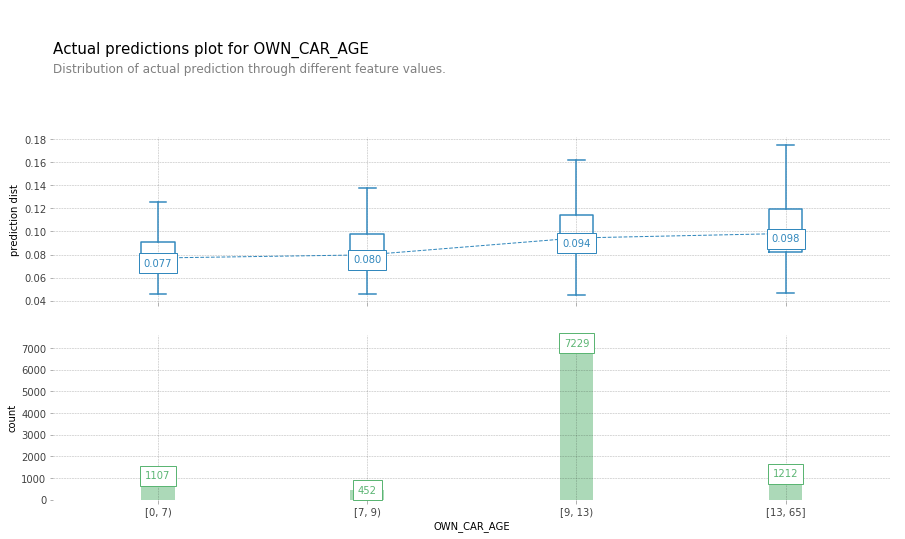

In [18]:
pdpd.info_actual('OWN_CAR_AGE')